In [65]:
import sys
!{sys.executable} -m pip install gs-quant

from datetime import date
from gs_quant.data import Dataset
from gs_quant.markets.securities import SecurityMaster, AssetIdentifier
from gs_quant.session import GsSession
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import six

In [41]:
client_id = '64019d2ee21e4a04b6722c5ee4f3bd7d'
client_secret = '2d4b5d81d3b7b114f90cf0462bedc581c119242a53240afbb080b09fd3bd1f40'

In [42]:
scopes = GsSession.Scopes.get_default()
GsSession.use(client_id=client_id, client_secret=client_secret, scopes=scopes)

In [43]:
ds = Dataset('USCANFPP_MINI')
gsids = ds.get_coverage()['gsid'].values.tolist()
ds.get_coverage()

,gsid
0,75154
1,193067
2,194688
3,902608
4,85627
5,13901
6,150407
7,161467
8,85072
9,82598


In [44]:
data = ds.get_data(date(2017, 1, 15), date(2018, 1, 15), gsid=gsids[0:5])
data

,financialReturnsScore,growthScore,gsid,integratedScore,multipleScore,updateTime
date,,,,,,
2017-01-16,0.456,0.362,75154,0.508,0.294,2017-05-11T19:47:36Z
2017-01-17,0.456,0.362,75154,0.508,0.296,2017-05-11T19:47:36Z
2017-01-18,0.454,0.362,75154,0.508,0.290,2017-05-11T19:47:36Z
2017-01-19,0.458,0.364,75154,0.508,0.300,2017-05-11T19:47:36Z
2017-01-20,0.452,0.370,75154,0.506,0.306,2017-05-11T19:47:36Z
2017-01-23,0.452,0.372,75154,0.506,0.302,2017-05-11T19:47:36Z
2017-01-24,0.450,0.368,75154,0.504,0.306,2017-05-11T19:47:36Z
2017-01-25,0.454,0.360,75154,0.500,0.312,2017-05-11T19:47:36Z
2017-01-26,0.454,0.356,75154,0.496,0.322,2017-05-11T19:47:36Z


In [105]:
str(data1[data1['gsid'] == '75154'][data1['integratedScore'] == max(data1['integratedScore'])].iloc[0]['integratedScore'])

'0.508'

In [120]:
max_pos = np.argmax(list(data['integratedScore']))
str(data.iloc[max_pos]['gsid'])

'194688'

In [118]:
max_pos = np.argmax(list(data[data['gsid'] == '75154']['integratedScore']))
data.iloc[max_pos]['integratedScore']

0.596

In [98]:
str(data[data['integratedScore'] == max(data['integratedScore'])].iloc[0]['gsid'])

'194688'

In [90]:
data1

,financialReturnsScore,growthScore,gsid,integratedScore,multipleScore,updateTime
date,,,,,,
2017-01-16,0.456,0.362,75154,0.508,0.294,2017-05-11T19:47:36Z
2017-01-17,0.456,0.362,75154,0.508,0.296,2017-05-11T19:47:36Z
2017-01-18,0.454,0.362,75154,0.508,0.290,2017-05-11T19:47:36Z


In [88]:
text_l = "<asdfasdf> multiple rows: 1 5"
start_row = int(text_l.split(' ')[3].strip())
end_row = int(text_l.split(' ')[4].strip())
data.iloc[start_row:end_row, :].to_dict()

{'financialReturnsScore': {Timestamp('2017-01-17 00:00:00'): 0.456,
  Timestamp('2017-01-18 00:00:00'): 0.454,
  Timestamp('2017-01-19 00:00:00'): 0.458,
  Timestamp('2017-01-20 00:00:00'): 0.452},
 'growthScore': {Timestamp('2017-01-17 00:00:00'): 0.362,
  Timestamp('2017-01-18 00:00:00'): 0.362,
  Timestamp('2017-01-19 00:00:00'): 0.364,
  Timestamp('2017-01-20 00:00:00'): 0.37},
 'gsid': {Timestamp('2017-01-17 00:00:00'): '75154',
  Timestamp('2017-01-18 00:00:00'): '75154',
  Timestamp('2017-01-19 00:00:00'): '75154',
  Timestamp('2017-01-20 00:00:00'): '75154'},
 'integratedScore': {Timestamp('2017-01-17 00:00:00'): 0.508,
  Timestamp('2017-01-18 00:00:00'): 0.508,
  Timestamp('2017-01-19 00:00:00'): 0.508,
  Timestamp('2017-01-20 00:00:00'): 0.506},
 'multipleScore': {Timestamp('2017-01-17 00:00:00'): 0.296,
  Timestamp('2017-01-18 00:00:00'): 0.29,
  Timestamp('2017-01-19 00:00:00'): 0.3,
  Timestamp('2017-01-20 00:00:00'): 0.306},
 'updateTime': {Timestamp('2017-01-17 00:00:00'

In [94]:
text_l = "<12312312adaa> gsid only 75154"
gsid_num = text_l.split(' ')[3].strip()
data1[data1['gsid'] == gsid_num].to_dict()

{'financialReturnsScore': {Timestamp('2017-01-16 00:00:00'): 0.456,
  Timestamp('2017-01-17 00:00:00'): 0.456,
  Timestamp('2017-01-18 00:00:00'): 0.454},
 'growthScore': {Timestamp('2017-01-16 00:00:00'): 0.362,
  Timestamp('2017-01-17 00:00:00'): 0.362,
  Timestamp('2017-01-18 00:00:00'): 0.362},
 'gsid': {Timestamp('2017-01-16 00:00:00'): '75154',
  Timestamp('2017-01-17 00:00:00'): '75154',
  Timestamp('2017-01-18 00:00:00'): '75154'},
 'integratedScore': {Timestamp('2017-01-16 00:00:00'): 0.508,
  Timestamp('2017-01-17 00:00:00'): 0.508,
  Timestamp('2017-01-18 00:00:00'): 0.508},
 'multipleScore': {Timestamp('2017-01-16 00:00:00'): 0.294,
  Timestamp('2017-01-17 00:00:00'): 0.296,
  Timestamp('2017-01-18 00:00:00'): 0.29},
 'updateTime': {Timestamp('2017-01-16 00:00:00'): '2017-05-11T19:47:36Z',
  Timestamp('2017-01-17 00:00:00'): '2017-05-11T19:47:36Z',
  Timestamp('2017-01-18 00:00:00'): '2017-05-11T19:47:36Z'}}

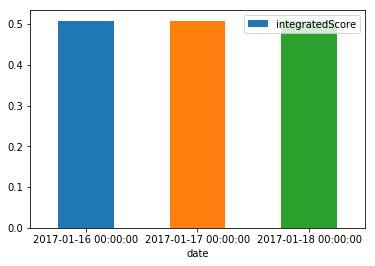

In [61]:
data1 = data.iloc[0:3, :]
data1.plot.bar(y=3, rot=0)

In [66]:
def render_mpl_table(dataf, num_rows=5 ,col_width=3.0, row_height=0.625, font_size=14,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    data = dataf.head(num_rows)
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in  six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax

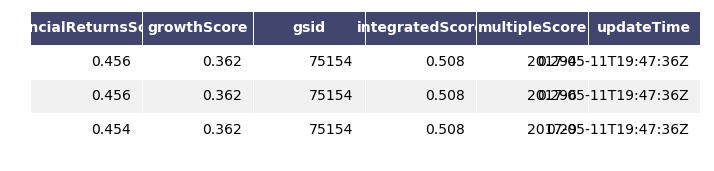

In [67]:
render_mpl_table(data1, num_rows=3, header_columns=0, col_width=2.0)

In [15]:
print(data.head())

            financialReturnsScore  growthScore   gsid  integratedScore  \
date                                                                     
2017-01-16                  0.456        0.362  75154            0.508   
2017-01-17                  0.456        0.362  75154            0.508   
2017-01-18                  0.454        0.362  75154            0.508   
2017-01-19                  0.458        0.364  75154            0.508   
2017-01-20                  0.452        0.370  75154            0.506   

            multipleScore            updateTime  
date                                             
2017-01-16          0.294  2017-05-11T19:47:36Z  
2017-01-17          0.296  2017-05-11T19:47:36Z  
2017-01-18          0.290  2017-05-11T19:47:36Z  
2017-01-19          0.300  2017-05-11T19:47:36Z  
2017-01-20          0.306  2017-05-11T19:47:36Z  


In [25]:
for idx, row in data.iterrows():
    # print(row)
    marqueeAssetId = row['growthScore']
    #asset = SecurityMaster.get_asset(marqueeAssetId, AssetIdentifier.MARQUEE_ID)
    #data.loc[data['assetId'] == marqueeAssetId, 'assetName'] = asset.name

print(data.head())

            financialReturnsScore  growthScore   gsid  integratedScore  \
date                                                                     
2017-01-16                  0.456        0.362  75154            0.508   
2017-01-17                  0.456        0.362  75154            0.508   
2017-01-18                  0.454        0.362  75154            0.508   
2017-01-19                  0.458        0.364  75154            0.508   
2017-01-20                  0.452        0.370  75154            0.506   

            multipleScore            updateTime  
date                                             
2017-01-16          0.294  2017-05-11T19:47:36Z  
2017-01-17          0.296  2017-05-11T19:47:36Z  
2017-01-18          0.290  2017-05-11T19:47:36Z  
2017-01-19          0.300  2017-05-11T19:47:36Z  
2017-01-20          0.306  2017-05-11T19:47:36Z  
